In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split


## Task1

In [92]:
# Linear Regression class
class GaussianRegression:
    def __init__(self, bases,add_bias=True):
        self.add_bias = add_bias
        self.bases = bases
        self.w = None
    
    def gaussian_transformation(self,x):
        gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)  
        mus = np.linspace(0,20,self.bases)
        X = np.zeros((len(x),self.bases))
        for i, mu in enumerate(mus):
            X[:,i] = gaussian(x,mu,1)
        return X

    def fit(self, x, y):
        X = self.gaussian_transformation(x)
        if y.ndim == 1:
            y = y[:, None]
        N = X.shape[0]
        if self.add_bias:
            X = np.column_stack([X, np.ones(N)])
        #self.w = np.linalg.lstsq(X, y, rcond=None)[0]
        self.w = np.linalg.pinv(X.T@X)@ X.T@y
        return self
    
    def predict(self, x):
        X = self.gaussian_transformation(x)

        if self.add_bias:
            N = X.shape[0]
            X = np.column_stack([X, np.ones(N)])

        return X @ self.w

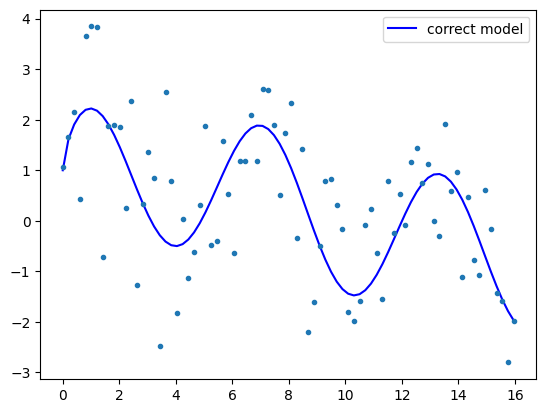

In [93]:
# Generating data

# N = 100
# X = np.linspace(0,20, N)

# y_true = np.sin(np.sqrt(X)) + np.cos(X) + np.sin(X)

# y = y_true + np.random.normal(0, 1, 100)
### aziz's code
f = lambda x: np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x)
def generate_data(n, train=0.8):
  
  train_size = int(n * train)

  x = np.linspace(0, 20, n)
  e = np.random.normal(0, 1, n)

  x_train = np.sort(x[: train_size])
  x_test = np.sort(x[train_size:])

  y_train = f(x_train) + e[:train_size]
  y_test = f(x_test) + e[train_size:]

  return x_train, x_test, y_train, y_test

# train_test_split 
#X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = generate_data(100)

#y_true_train, y_true_test = train_test_split(y_true, test_size=0.2, shuffle=False)
y_true_train = f(X_train)
y_true_test = f(X_test)
plt.plot(X_train, y_true_train, 'b-', label='correct model')      
plt.plot(X_train, y_train, '.')
plt.legend()      

[np.float64(103.01768339204688), np.float64(24.034210584888772), np.float64(16.268136619838298), np.float64(28.578294750805142), np.float64(38.09787720908818), np.float64(46.50348564708569), np.float64(49.04498844995392), np.float64(49.380387879008126), np.float64(49.48450204587206), np.float64(49.5315449929102), np.float64(49.54839634711273)]
[np.float64(104.26907205232662), np.float64(7281.957204783701), np.float64(3255351233.660793), np.float64(570611700351.7347), np.float64(1380314465485.8376), np.float64(356966331359.44214), np.float64(6694935446653.266), np.float64(6148633304152.5625), np.float64(5933475926642.26), np.float64(5849337450401.302), np.float64(5824210301017.631)]
The gaussian base with the optimal result is 0


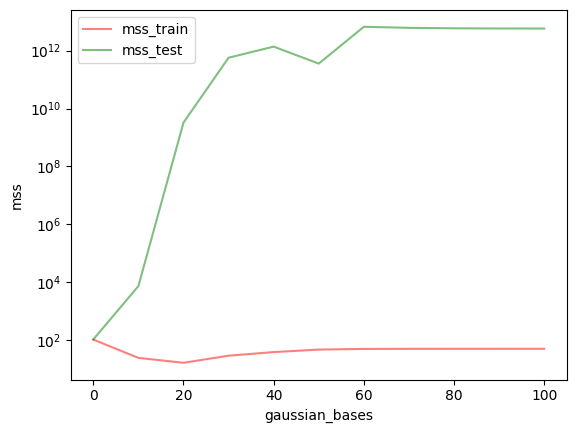

In [94]:
gaussian_bases = [0,10,20,30,40,50,60,70,80,90,100]
model_list = []
mss_train_list = []
mss_test_list = []

y_true_train = y_true_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# create model
for i,bases in enumerate(gaussian_bases):

    model = GaussianRegression(bases)

    y_train_predict = model.fit(X_train,y_train).predict(X_train)
    model_list.append(model)
    mss_train = (y_train_predict - y_true_train)**2
    mss_train_list.append(np.sum(mss_train))

    y_test_predict = model.predict(X_test)

    mss_test = (y_test_predict - y_test)**2

    mss_test_list.append(np.sum(mss_test))
print(mss_train_list)
print(mss_test_list)

min_test_value, min_i = mss_test_list[0], 0
for i in range(11):
    cur = mss_test_list[i]
    if cur < min_test_value:
        min_test_value = cur
        min_i = i

print(f'The gaussian base with the optimal result is {gaussian_bases[min_i]}')

# plot the graph
plt.plot(gaussian_bases, mss_train_list, 'r-', alpha=.5, label='mss_train')
plt.plot(gaussian_bases, mss_test_list, 'g-', alpha=.5, label='mss_test')
plt.xlabel('gaussian_bases')
plt.ylabel(r'mss')
plt.yscale('log')
plt.legend()
plt.show()

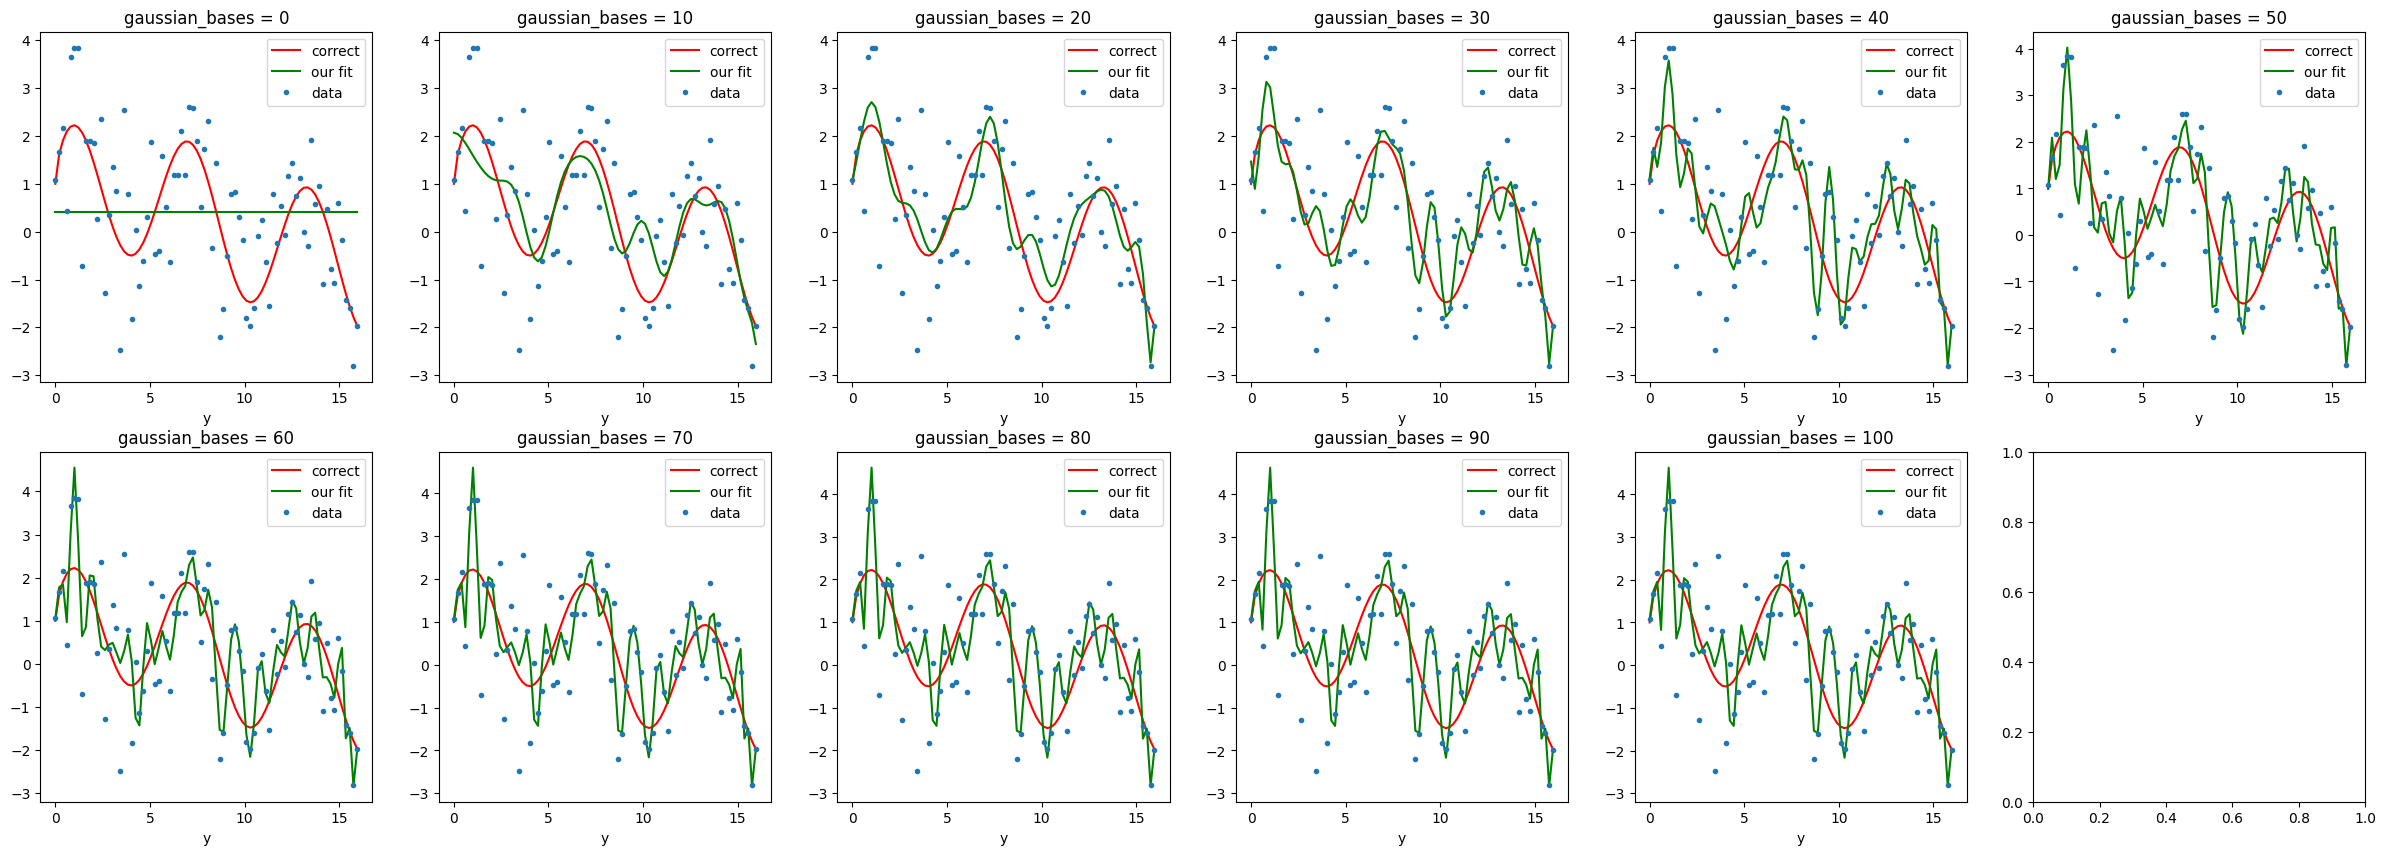

In [95]:
fig, ax = plt.subplots(2,6,figsize=(30,10))

gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
for i in range(11):
    y_train_predict = model_list[i].fit(X_train,y_train).predict(X_train)
    ax[i].plot(X_train, y_true_train, 'r-', label='correct')      
    ax[i].plot(X_train, y_train_predict, 'g-', label='our fit')
    ax[i].plot(X_train, y_train, '.', label='data')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases[i]}')
    ax[i].legend()

# Task2


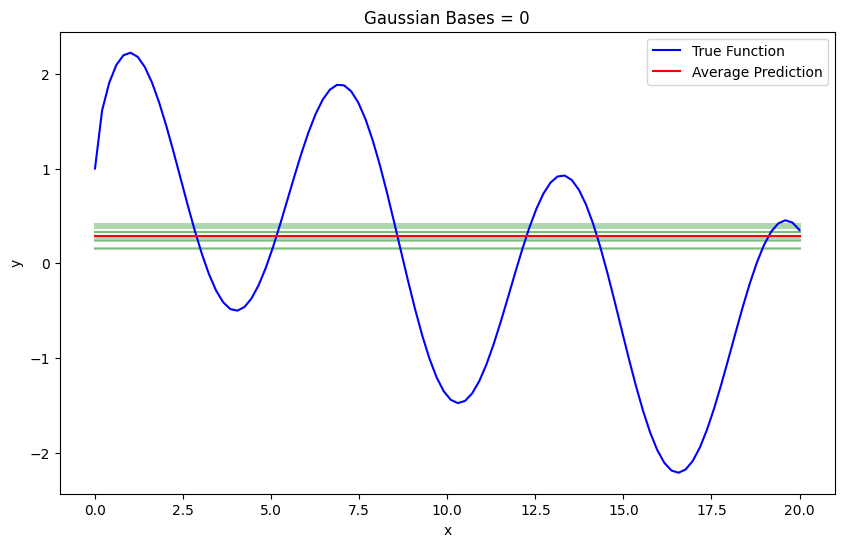

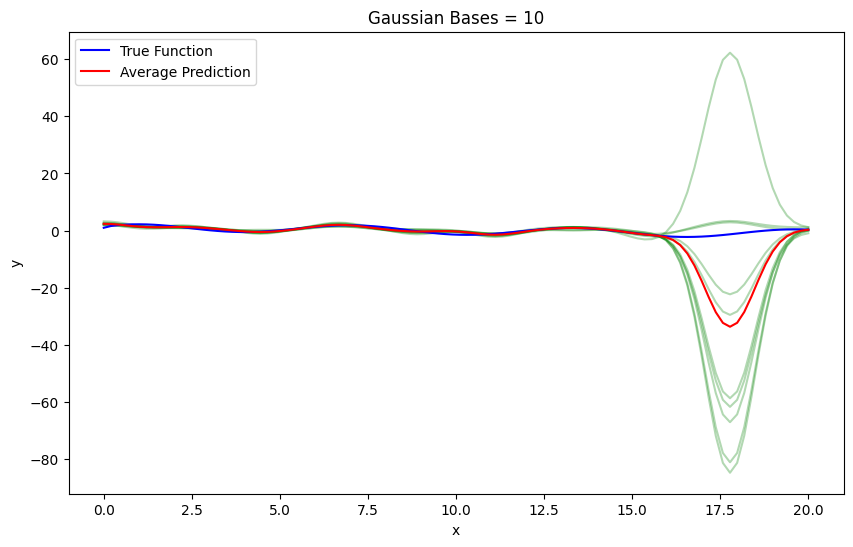

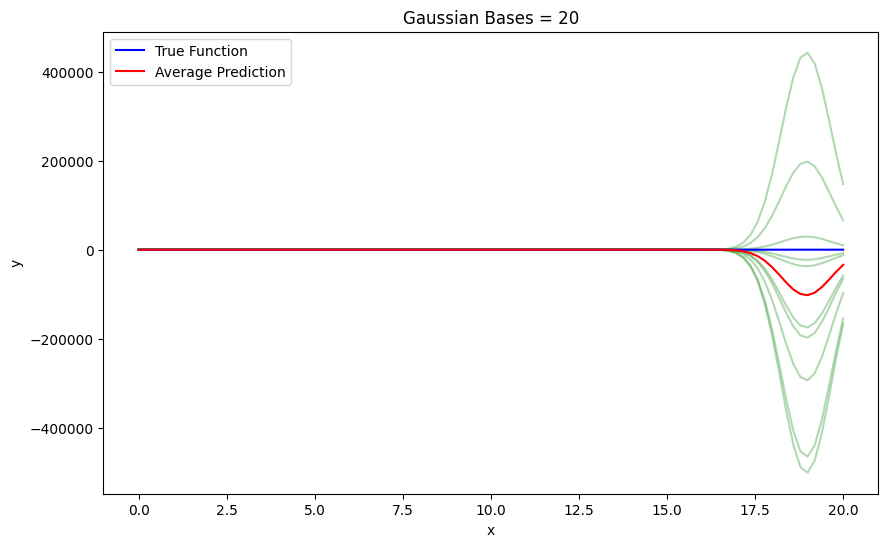

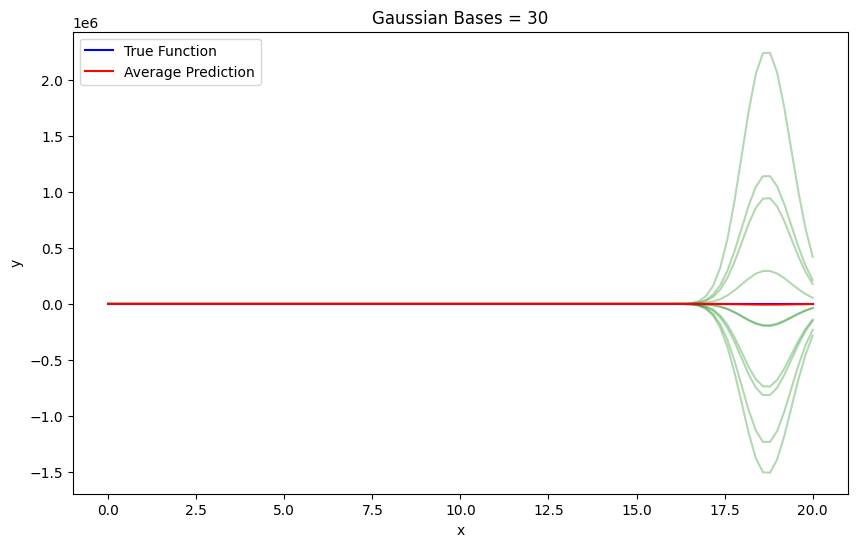

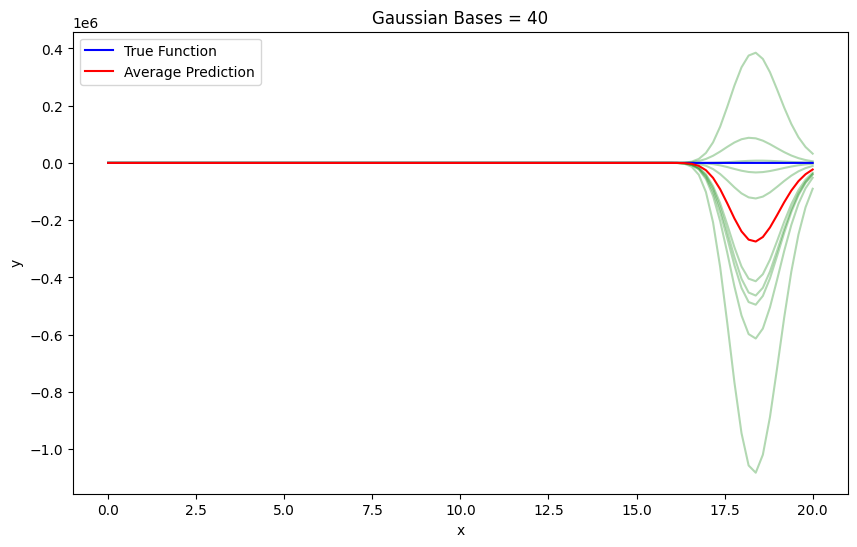

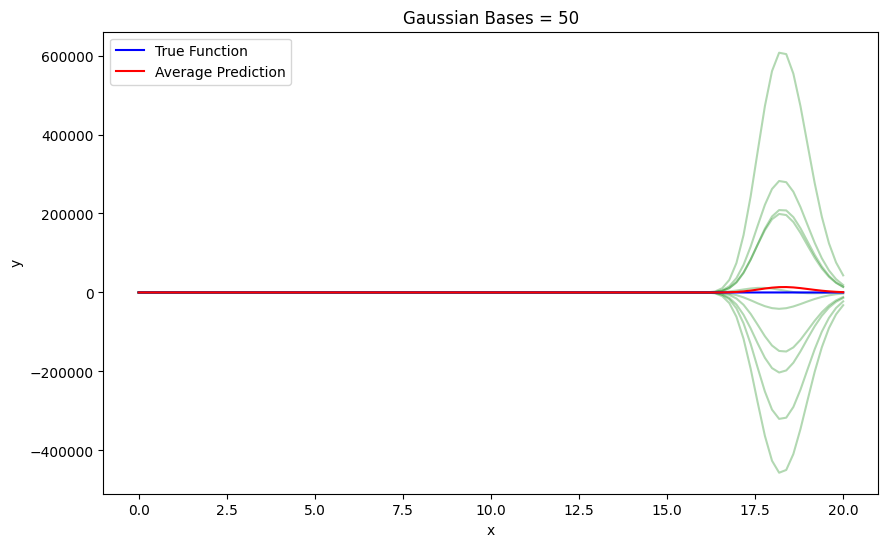

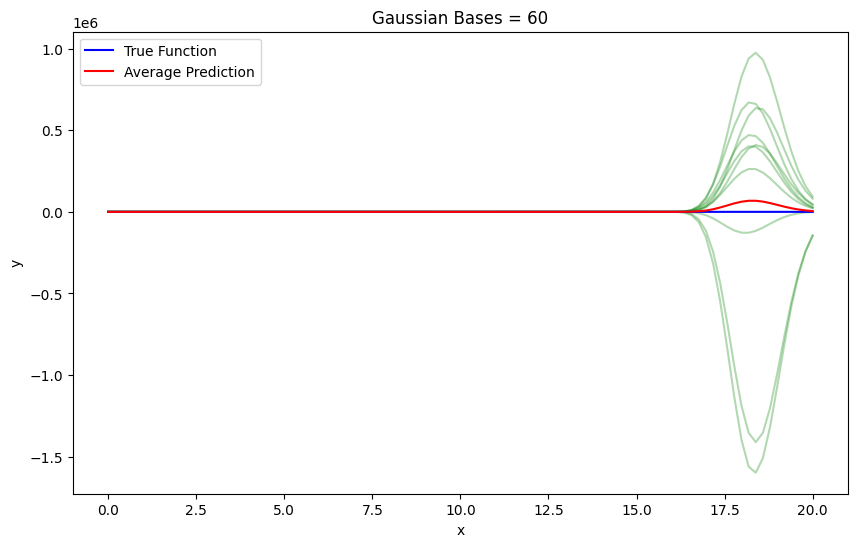

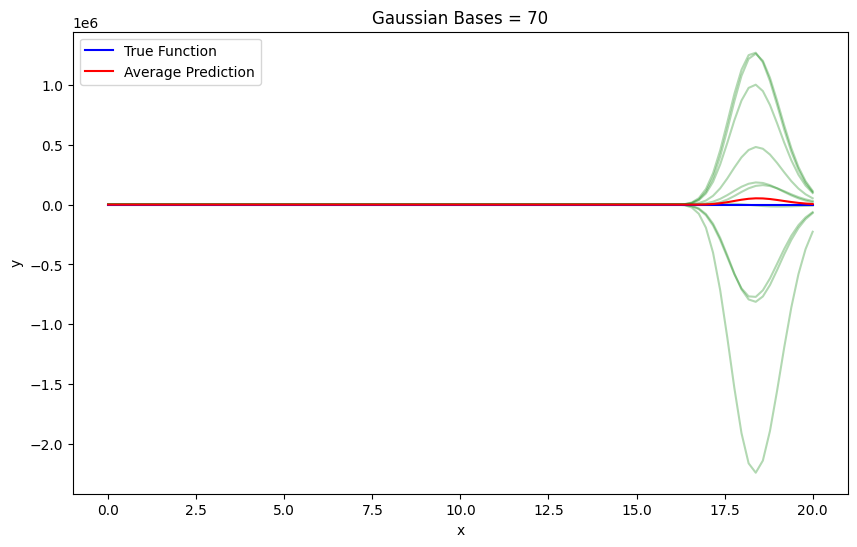

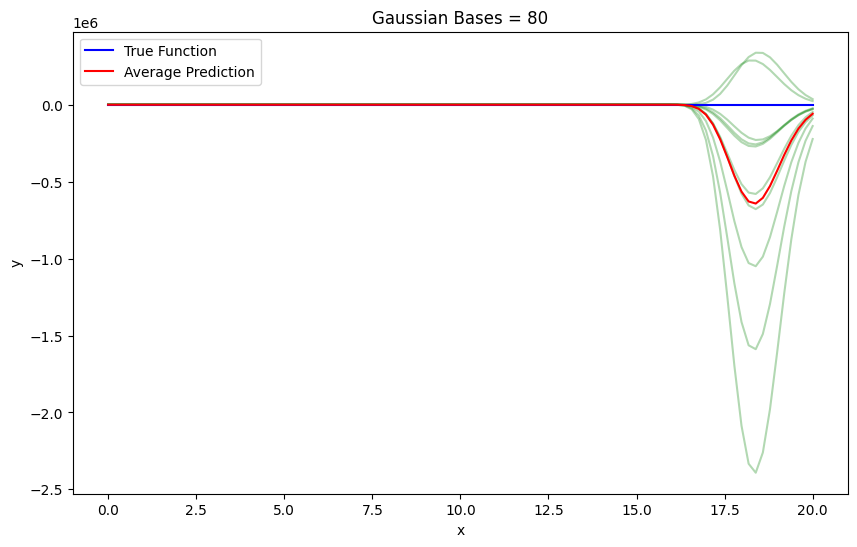

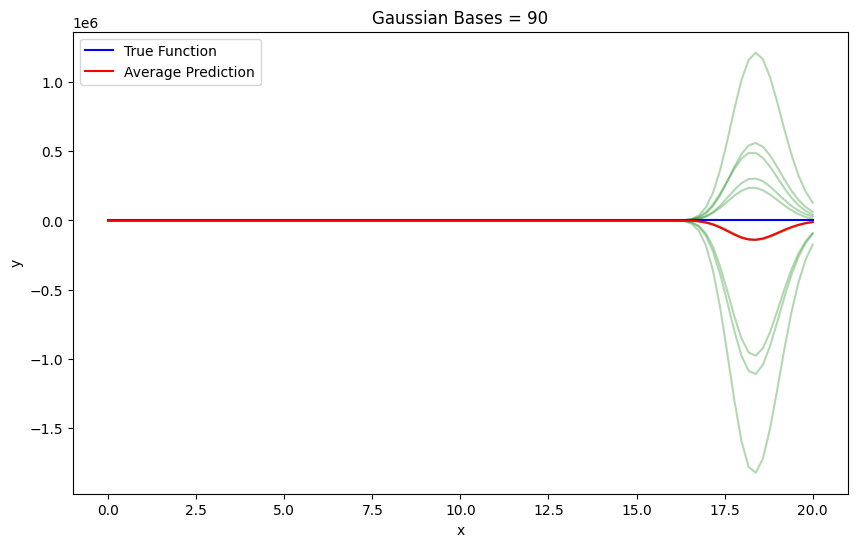

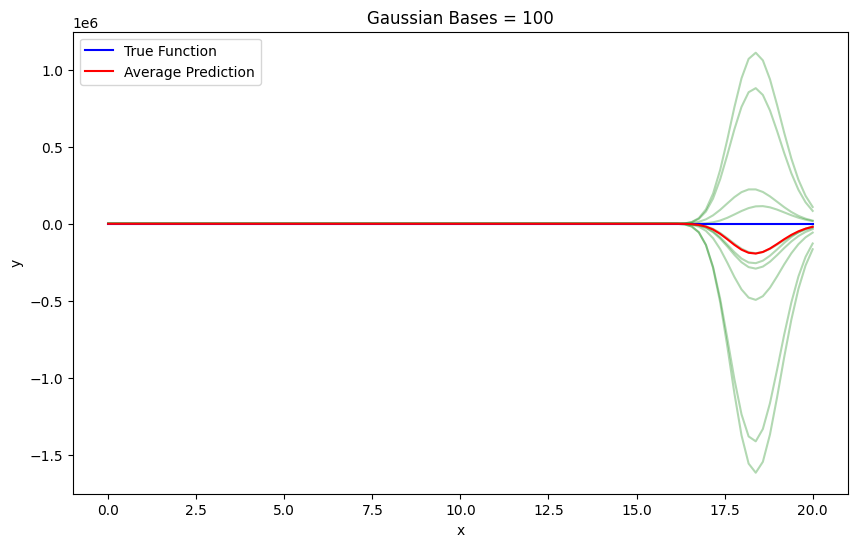

In [99]:
mss_train_list = []
mss_test_list = []
for base in gaussian_bases:
    sum_mss_train = 0
    sum_mss_test = 0
    for i in range(10):
        X_train, X_test, y_train, y_test = generate_data(100)
        y_true_train = f(X_train)
        model = GaussianRegression(base)
        y_train_predict = model.fit(X_train,y_train).predict(X_train)
        mss_train = (y_train_predict - y_true_train)**2
        sum_mss_train += np.sum(mss_train)

        y_test_predict = model.predict(X_test)
        mss_test = (y_test_predict - y_test)**2
        sum_mss_test += np.sum(mss_test)

    sum_mss_train = sum_mss_train/10
    sum_mss_test = sum_mss_test/10
    mss_train_list.append(sum_mss_train)
    mss_test_list.append(sum_mss_test)


    min_test_value, min_i = mss_test_list[0], 0
for i in range(11):
    cur = mss_test_list[i]
    if cur < min_test_value:
        min_test_value = cur
        min_i = i

print(f'The gaussian base with the optimal result is {gaussian_bases[min_i]}')

# plot the graph
plt.plot(gaussian_bases, mss_train_list, 'r-', alpha=.5, label='mss_train')
plt.plot(gaussian_bases, mss_test_list, 'g-', alpha=.5, label='mss_test')
plt.xlabel('gaussian_bases')
plt.ylabel(r'mss')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(2,6,figsize=(30,10))

gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
for i in range(11):
    y_train_predict = model_list[i].fit(X_train,y_train).predict(X_train)
    ax[i].plot(X_train, y_true_train, 'r-', label='correct')      
    ax[i].plot(X_train, y_train_predict, 'g-', label='our fit')
    ax[i].plot(X_train, y_train, '.', label='data')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases[i]}')
    ax[i].legend()